In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
from pathlib import Path
import os

    

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/significant-earthquake-dataset-1900-2023/Significant Earthquake Dataset 1900-2023.csv


In [2]:
Earthquakes = pd.read_csv('/kaggle/input/significant-earthquake-dataset-1900-2023/Significant Earthquake Dataset 1900-2023.csv')
Earthquakes

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.10,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.60,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.10,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.70,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.60,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37326,1902-01-01T05:20:30.000Z,"113 km ESE of Nikolski, Alaska",52.3800,-167.4500,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
37327,1901-12-31T09:02:30.000Z,"221 km SW of Nikolski, Alaska",51.4500,-171.0200,NaN,7.10,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
37328,1901-12-30T22:34:00.000Z,south of Alaska,52.0000,-160.0000,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
37329,1901-03-03T07:45:00.000Z,"12 km NNW of Parkfield, California",36.0000,-120.5000,NaN,6.40,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell


In [3]:
print(Earthquakes.dtypes)
Earthquakes = Earthquakes[['Time','Place','Latitude','Longitude','Mag']]

Time                object
Place               object
Latitude           float64
Longitude          float64
Depth              float64
Mag                float64
MagType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
ID                  object
Updated             object
Unnamed: 14        float64
Type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object


In [4]:
Earthquakes['Time'] = pd.to_datetime(Earthquakes['Time'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
Earthquakes['Time']

0       2023-02-17 09:37:34.868000+00:00
1       2023-02-16 05:37:05.138000+00:00
2       2023-02-15 18:10:10.060000+00:00
3       2023-02-15 06:38:09.034000+00:00
4       2023-02-14 13:16:51.072000+00:00
                      ...               
37326          1902-01-01 05:20:30+00:00
37327          1901-12-31 09:02:30+00:00
37328          1901-12-30 22:34:00+00:00
37329          1901-03-03 07:45:00+00:00
37330          1900-10-09 12:25:00+00:00
Name: Time, Length: 37331, dtype: datetime64[ns, UTC]

In [6]:
high_magnitude = Earthquakes[Earthquakes.Mag >6.1].count()[0]
medium_magnitude = Earthquakes[(Earthquakes.Mag>=5)&(Earthquakes.Mag<=6)].count()[0]
low_magnitude = Earthquakes.loc[Earthquakes.Mag<5].count()[0]

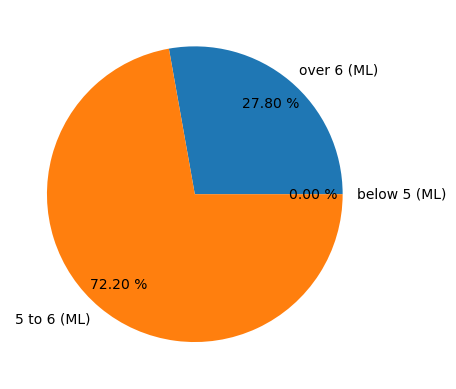

<Figure size 500x800 with 0 Axes>

<Figure size 500x800 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
Magnitudes = [high_magnitude,medium_magnitude,low_magnitude]
label = ['over 6 (ML) ','5 to 6 (ML)', 'below 5 (ML)']
explode = (0,0,0)
plt.pie(Magnitudes, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

plt.figure(figsize=(5, 8), dpi=100)

In [8]:

mask = ((Earthquakes['Time'] >= '1920-03-03') & (Earthquakes['Time'] < '2023-02-17'))
df = Earthquakes.loc[mask]

In [9]:
import plotly.express as px
import pandas as pd

# Load earthquake data

# Filter the data to include only earthquakes with magnitude greater than 7.5

df_mag = Earthquakes[Earthquakes["Mag"] > 7]

# Create a Plotly Scattergeo map
fig = px.scatter_geo(df_mag, lat='Latitude', lon='Longitude', 
                     color='Mag', hover_name='Place',
                     size_max=10, projection='natural earth', title="Earthquake Hotspots 1900 to 2023")

# Show the map
fig.show()

In [10]:
# import folium

# m = folium.Map([df['Lat'].mean(), df['Long'].mean()], #center of a map
#                zoom_start=6, min_zoom = 5, max_zoom = 7) # max zoom is 18; restrict zooms not to scroll much
               
# folium.GeoJson(gr).add_to(m) # add gr - multipolygon of greek boundaries
# folium.LatLngPopup().add_to(m) # add custom popup of lat/long of selected point

# for i in range(0,25): # add markers of first 25 earthquakes of the dataset
#     folium.Marker([df.iloc[i]['Lat'], df.iloc[i]['Long']], 
#                   popup=df.iloc[i]['Year']).add_to(m) # add popup to markers as an accident year
# m

In [11]:
# def get_color(magnitude):
#     if magnitude < 3.0:
#         return 'g'
#     elif 3.0 <= magnitude < 5.0:
#         return 'y'
#     else:
#         return 'r'

In [12]:
# !pip install --upgrade pip

In [13]:
# pip install cartopy

In [14]:
# import cartopy.crs as ccrs

In [15]:
# plotting data on map

# ax = plt.axes(projection = ccrs.PlateCarree())
# ax.coastlines(resolution='50m')
# ax.stock_img()

# for i in range(len(mag)):
#     color = get_color(mag[i])
#     plt.scatter(lons[i], lats[i], s=mag[i]*10, c=color)

# plt.title('Earthquakes recorded from 1920 to 2023 2020')
# print(plt.show())